<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'


### 1. Import the data

In [3]:
import pandas as pd

# Load the dataset
csv_file = "C:/Users/ohene/Downloads/ais.csv"
df = pd.read_csv(csv_file)

# Display the first few rows of the dataset to ensure it's loaded correctly
print(df.head())


   rownames   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht  \
0         1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9   
1         2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7   
2         3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8   
3         4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0   
4         5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6   

     wt sex   sport  
0  78.9   f  B_Ball  
1  74.4   f  B_Ball  
2  69.1   f  B_Ball  
3  74.9   f  B_Ball  
4  64.6   f  B_Ball  


### 2. Do some EDA of relationships between features.

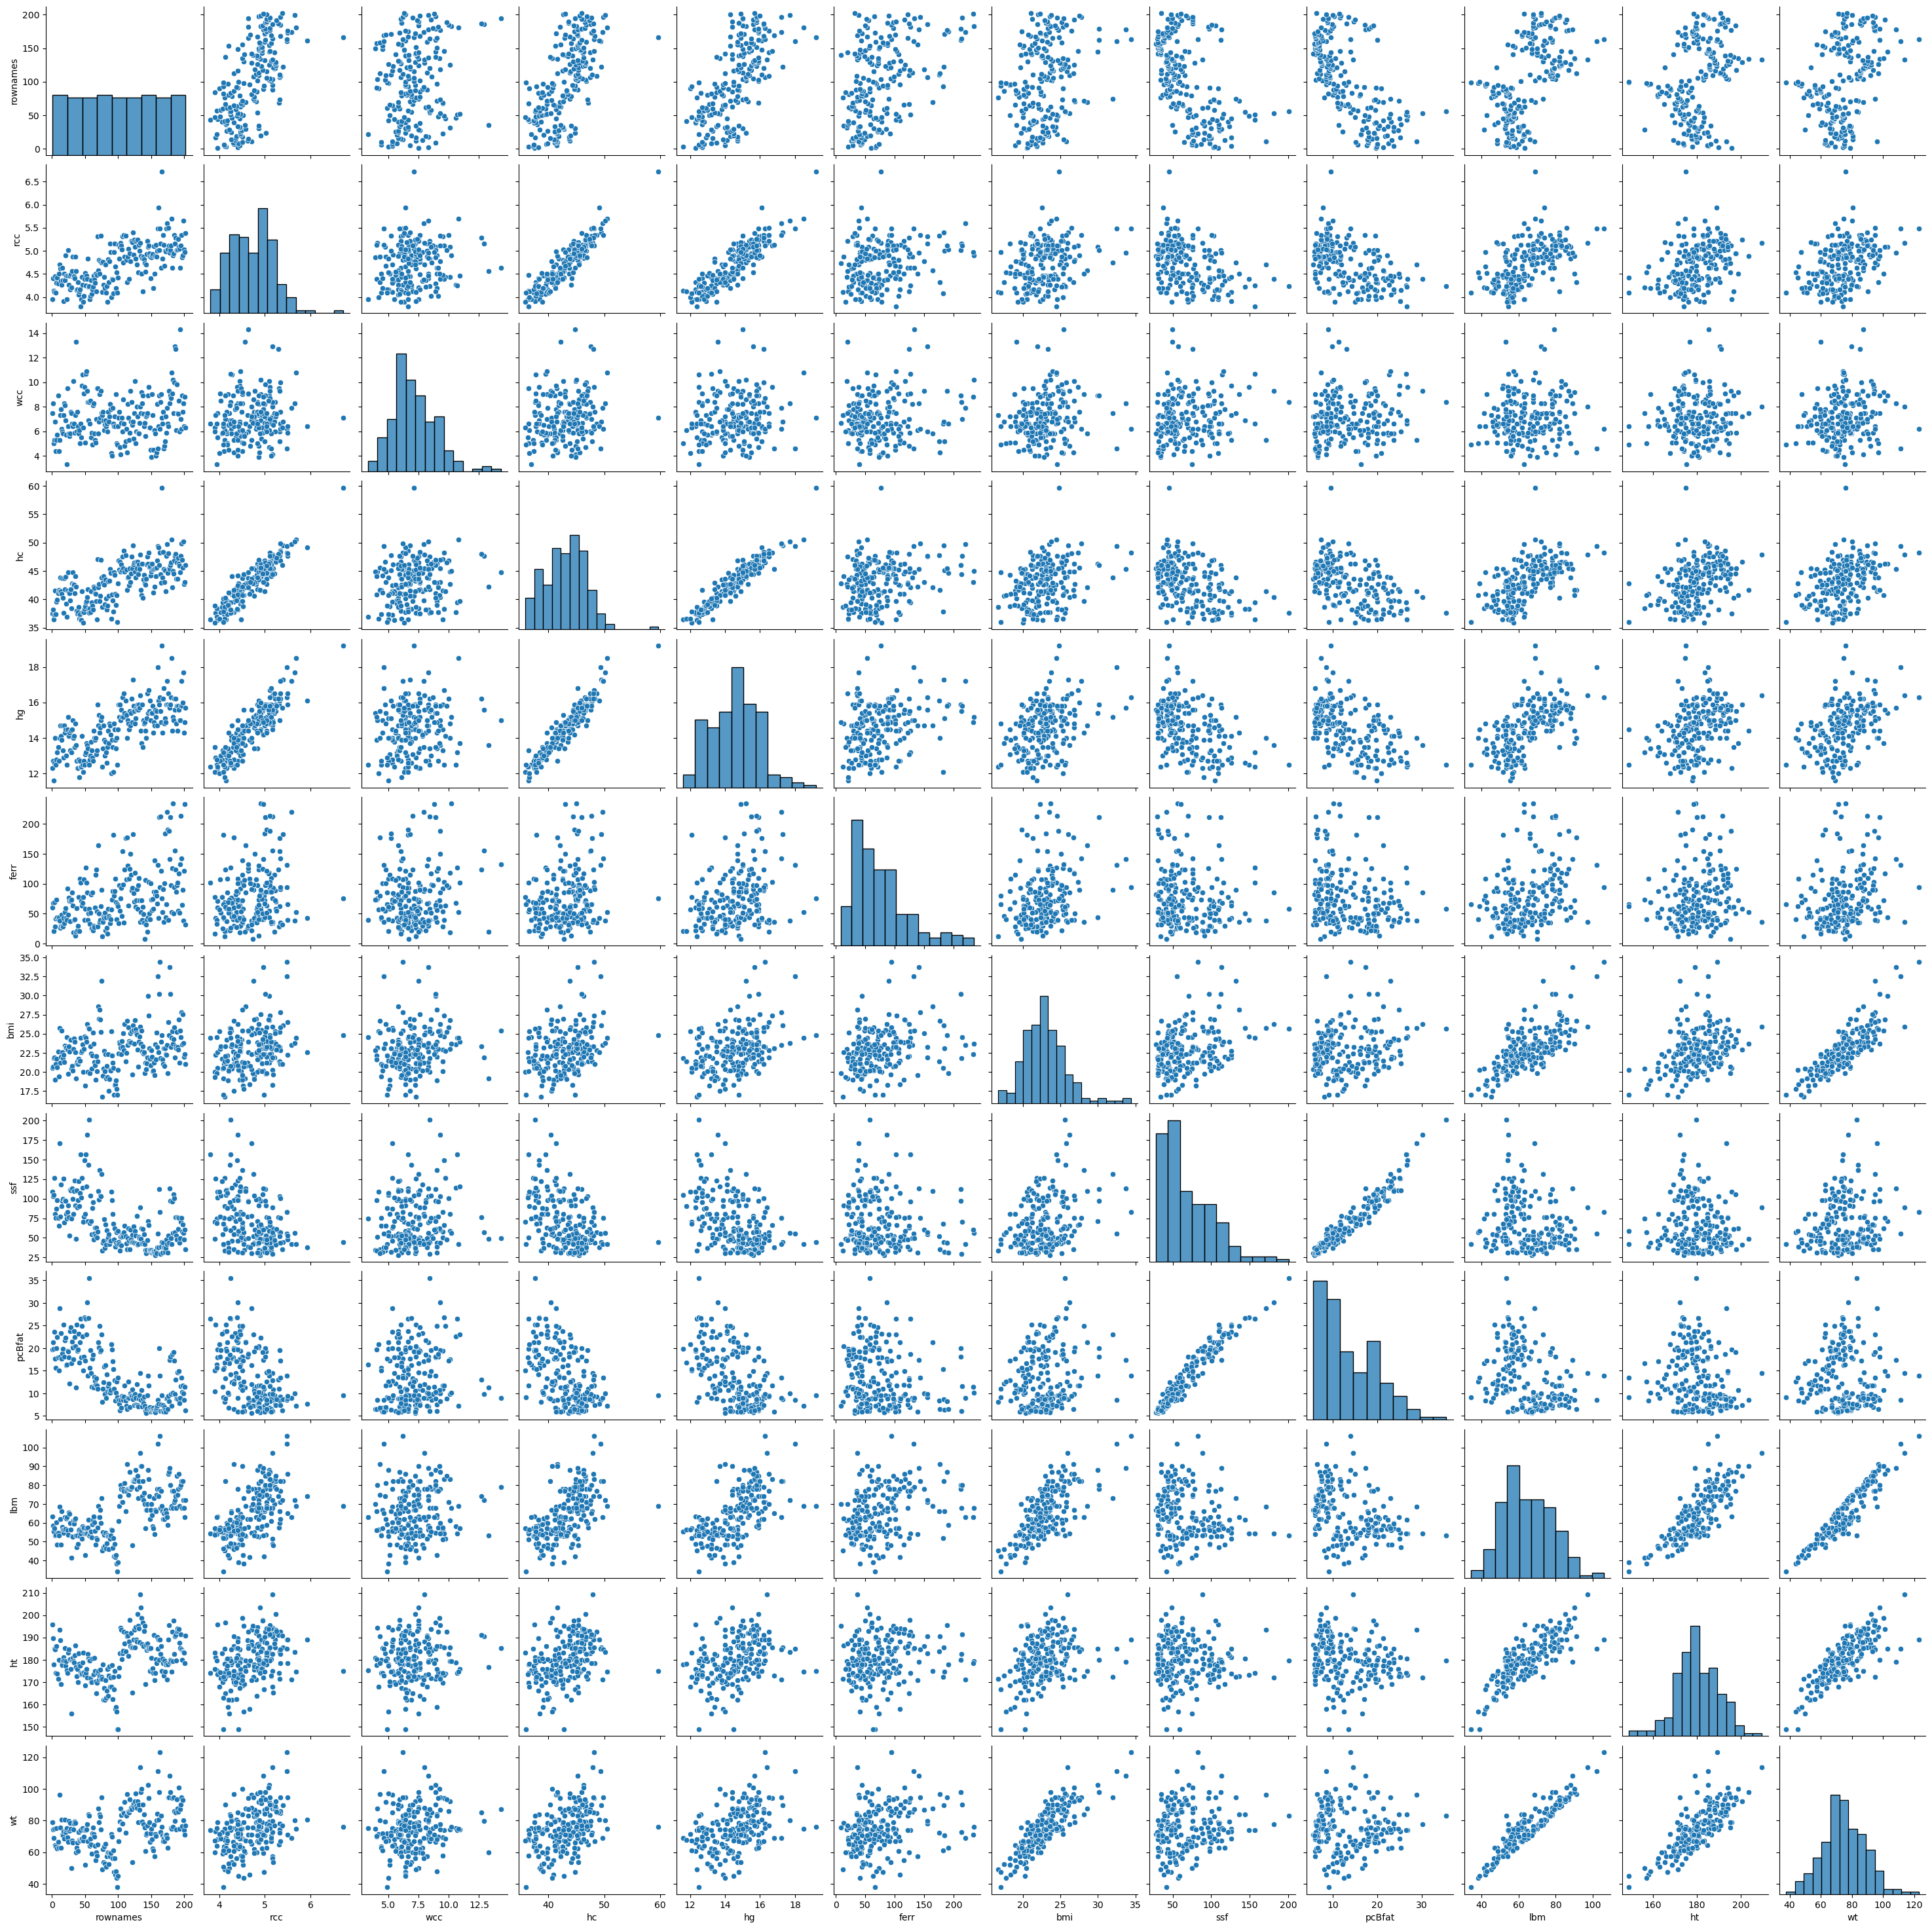

         rownames         rcc         wcc          hc          hg        ferr  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean   101.500000    4.718614    7.108911   43.091584   14.566337   76.876238   
std     58.456537    0.457976    1.800337    3.662989    1.362451   47.501239   
min      1.000000    3.800000    3.300000   35.900000   11.600000    8.000000   
25%     51.250000    4.372500    5.900000   40.600000   13.500000   41.250000   
50%    101.500000    4.755000    6.850000   43.500000   14.700000   65.500000   
75%    151.750000    5.030000    8.275000   45.575000   15.575000   97.000000   
max    202.000000    6.720000   14.300000   59.700000   19.200000  234.000000   

              bmi         ssf      pcBfat         lbm          ht          wt  
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000  
mean    22.955891   69.021782   13.507426   64.873713  180.103960   75.007921  
std      2.863933   32.565333 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

# Summary statistics to understand the data distribution
print(df.describe())

# Checking for missing values
print(df.isnull().sum())


### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [5]:
from sklearn.preprocessing import StandardScaler

# Drop 'sex' and 'sport' columns
df_cleaned = df.drop(columns=['sex', 'sport'])

# Scale the features to put them on the same scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Convert the scaled data back to a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=df_cleaned.columns)


### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [6]:
from sklearn.cluster import KMeans

# Cluster with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(df_scaled)
labels_2 = kmeans_2.labels_

# Cluster with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(df_scaled)
labels_4 = kmeans_4.labels_

# Add the cluster labels to the original DataFrame
df['Cluster_2'] = labels_2
df['Cluster_4'] = labels_4


### 5. Get the labels for the models using the labels_ attribute.

In [ ]:


# Get the cluster labels for k=2
labels_2 = kmeans_2.labels_

# Get the cluster labels for k=4
labels_4 = kmeans_4.labels_

# Display the labels
print("Cluster labels for k=2:\n", labels_2)
print("\nCluster labels for k=4:\n", labels_4)


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [7]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

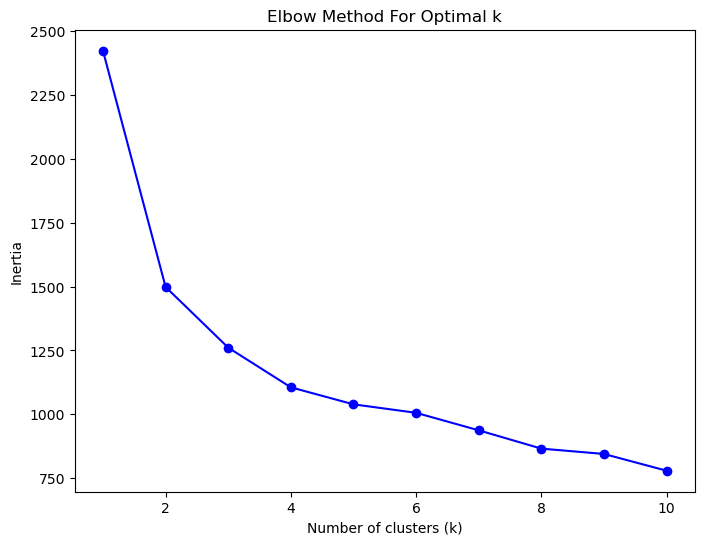

In [8]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

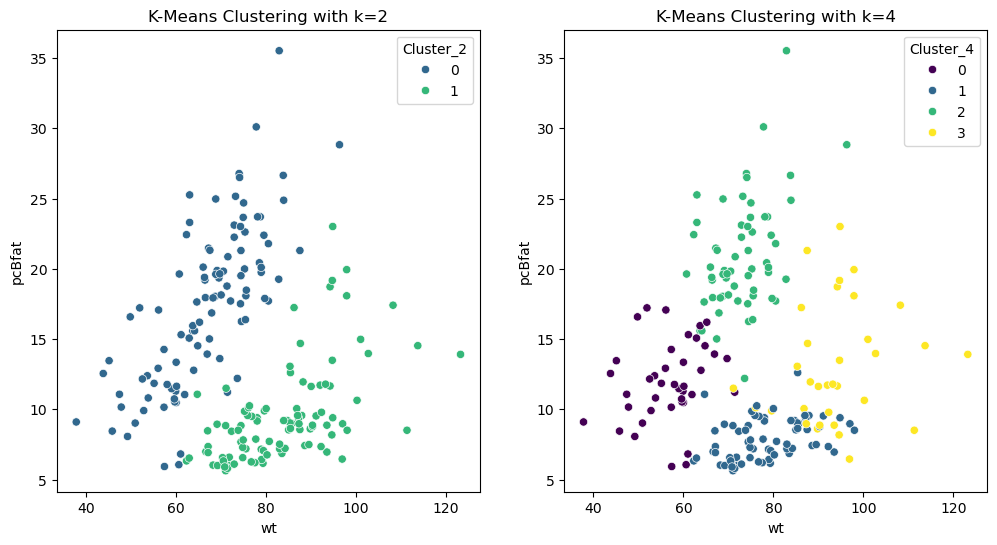

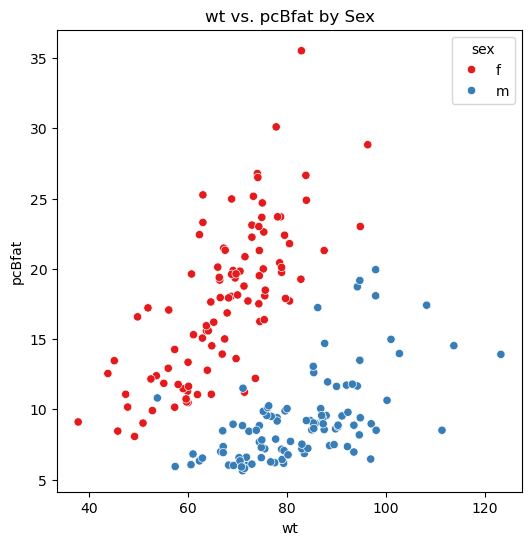

In [9]:
# Plot wt vs. pcBfat using the clusters from k=2
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='wt', y='pcBfat', hue='Cluster_2', data=df, palette='viridis')
plt.title('K-Means Clustering with k=2')

plt.subplot(1, 2, 2)
sns.scatterplot(x='wt', y='pcBfat', hue='Cluster_4', data=df, palette='viridis')
plt.title('K-Means Clustering with k=4')

plt.show()

# Plot wt vs. pcBfat using hue 'sex'
plt.figure(figsize=(6, 6))
sns.scatterplot(x='wt', y='pcBfat', hue='sex', data=df, palette='Set1')
plt.title('wt vs. pcBfat by Sex')
plt.show()




---



---



> > > > > > > > > Â© 2024 Institute of Data


---



---



